In [5]:
from tensorflow.keras.applications.mobilenet import MobileNet 
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

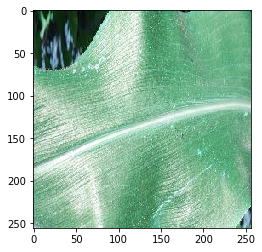

In [4]:
import cv2
from matplotlib import pyplot as plt
im = cv2.imread('./corn/0/0f6d1e23-9ac3-4d2d-bd32-9b0cb91bf4e3___R.S_HL 0625 copy.jpg')
plt.imshow(im)

In [6]:
base_model = MobileNet(input_shape = (128, 128, 3), dropout = 1e-3, include_top = False, weights = 'imagenet')

In [7]:
base_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [19]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(3, activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = x)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer ='adam')

In [20]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128 

In [21]:
image_data_generator = ImageDataGenerator(rescale = 1./255, rotation_range = 90, zoom_range = 0.1, validation_split = 0.1)
train_generator = image_data_generator.flow_from_directory('./corn', target_size = (128, 128), batch_size = 32, class_mode = 'categorical', subset = 'training')
valid_generator = image_data_generator.flow_from_directory('./corn', target_size = (128, 128), batch_size = 32, class_mode = 'categorical', subset = 'validation')

Found 2581 images belonging to 3 classes.
Found 286 images belonging to 3 classes.


In [22]:
model.fit_generator(train_generator, steps_per_epoch = int(2581/32), epochs = 30, validation_data = valid_generator, validation_steps = int(286/32))

Epoch 1/30
80/80 [==============================] - 14s 175ms/step - loss: 0.1167 - accuracy: 0.9647 - val_loss: 0.1322 - val_accuracy: 0.9805
Epoch 2/30
80/80 [==============================] - 14s 174ms/step - loss: 0.0470 - accuracy: 0.9859 - val_loss: 0.1979 - val_accuracy: 0.9805
Epoch 3/30
80/80 [==============================] - 14s 175ms/step - loss: 0.0346 - accuracy: 0.9914 - val_loss: 0.1537 - val_accuracy: 0.9648
Epoch 4/30
80/80 [==============================] - 14s 169ms/step - loss: 0.0432 - accuracy: 0.9898 - val_loss: 0.0658 - val_accuracy: 0.9805
Epoch 5/30
80/80 [==============================] - 14s 174ms/step - loss: 0.0351 - accuracy: 0.9909 - val_loss: 0.0457 - val_accuracy: 0.9883
Epoch 6/30
80/80 [==============================] - 15s 188ms/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/30
80/80 [==============================] - 14s 171ms/step - loss: 0.0333 - accuracy: 0.9917 - val_loss: 0.0407 - val_accuracy: 0.9844

In [23]:
model.save('./corn.h5')

'./corn.h5'